In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Exploration and Preprocessing

In [11]:
#Loading CSV file into a Pandas DataFrame.
df= pd.read_csv("D:/CHRIST UNIVERSITY/Machine learning/ML_IEF.csv")

In [4]:
df.shape

(184, 16)

In [5]:
df.describe()

,Year,Overall Score (Economical Feedom),Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
count,184.0,176.000000,182.000000,182.000000,182.000000,177.000000,176.000000,176.000000,177.000000,176.000000,176.000000,178.000000,177.000000,177.000000
mean,2024.0,58.643182,53.597802,43.889560,48.937363,78.189831,64.036932,52.180682,62.323164,56.105114,67.590909,69.924719,56.440678,48.757062
std,0.0,11.153232,25.121679,21.897394,27.449579,12.931072,25.186746,33.724461,17.369644,10.690553,14.066586,12.191873,20.644120,18.575178
min,2024.0,2.900000,0.000000,3.600000,3.300000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,2024.0,51.975000,35.475000,27.550000,28.100000,72.500000,48.575000,19.200000,49.400000,51.250000,66.475000,63.700000,45.000000,30.000000
50%,2024.0,58.800000,49.150000,40.250000,44.950000,79.000000,70.250000,62.500000,65.500000,57.050000,70.900000,71.800000,60.000000,50.000000
75%,2024.0,65.750000,72.450000,58.375000,71.375000,86.900000,82.850000,82.450000,75.500000,62.650000,74.425000,79.200000,70.000000,60.000000
max,2024.0,83.500000,100.000000,97.400000,98.100000,100.000000,97.500000,100.000000,92.700000,78.900000,81.900000,95.000000,95.000000,90.000000


In [6]:
df.head()

,Country,Region,Year,Overall Score (Economical Feedom),Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,Afghanistan,Asia-Pacific,2024,NaN,4.9,18.1,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,2024,64.8,56.8,36.6,50.0,88.8,69.8,51.7,74.1,51.5,75.7,82.6,70.0,70.0
2,Algeria,Middle East/North Africa,2024,43.9,27.5,27.7,28.9,79.4,54.7,13.8,54.4,51.4,71.9,57.4,30.0,30.0
3,Angola,Sub-Saharan Africa,2024,54.3,40.4,27.8,25.7,86.5,85.8,91.1,44.6,50.8,60.0,68.6,30.0,40.0
4,Argentina,Americas,2024,49.9,34.5,39.8,55.8,67.0,54.3,35.7,55.5,53.5,29.4,58.6,55.0,60.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            184 non-null    object 
 1   Region                             184 non-null    object 
 2   Year                               184 non-null    int64  
 3   Overall Score (Economical Feedom)  176 non-null    float64
 4   Property Rights                    182 non-null    float64
 5   Government Integrity               182 non-null    float64
 6   Judicial Effectiveness             182 non-null    float64
 7   Tax Burden                         177 non-null    float64
 8   Government Spending                176 non-null    float64
 9   Fiscal Health                      176 non-null    float64
 10  Business Freedom                   177 non-null    float64
 11  Labor Freedom                      176 non-null    float64

In [8]:
print(df['Region'].unique())

['Asia-Pacific' 'Europe' 'Middle East/North Africa' 'Sub-Saharan Africa'
 'Americas']


In [9]:
print(df.isnull().sum())

Country                              0
Region                               0
Year                                 0
Overall Score (Economical Feedom)    8
Property Rights                      2
Government Integrity                 2
Judicial Effectiveness               2
Tax Burden                           7
Government Spending                  8
Fiscal Health                        8
Business Freedom                     7
Labor Freedom                        8
Monetary Freedom                     8
Trade Freedom                        6
Investment Freedom                   7
Financial Freedom                    7
dtype: int64


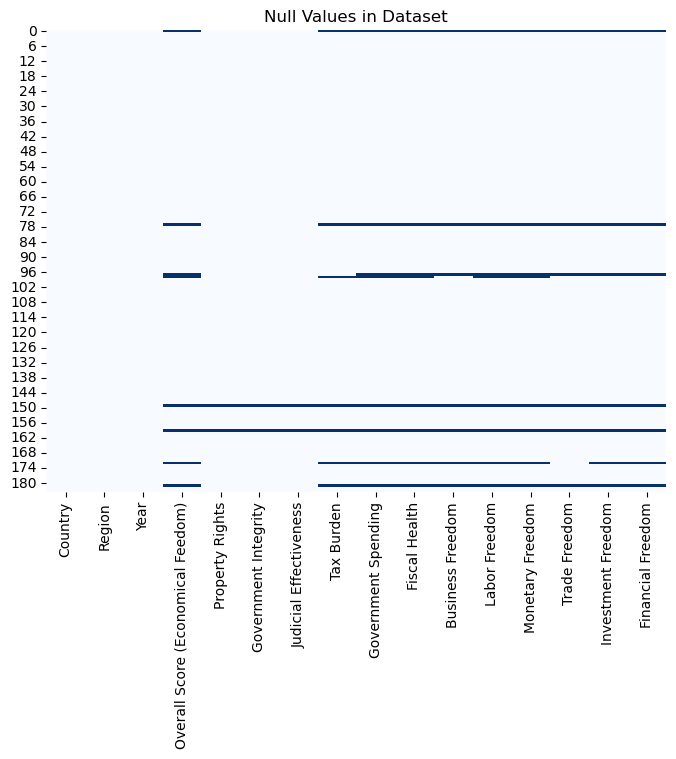

In [17]:
# Plotting null values using Matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Blues')
plt.title('Null Values in Dataset')
plt.show()

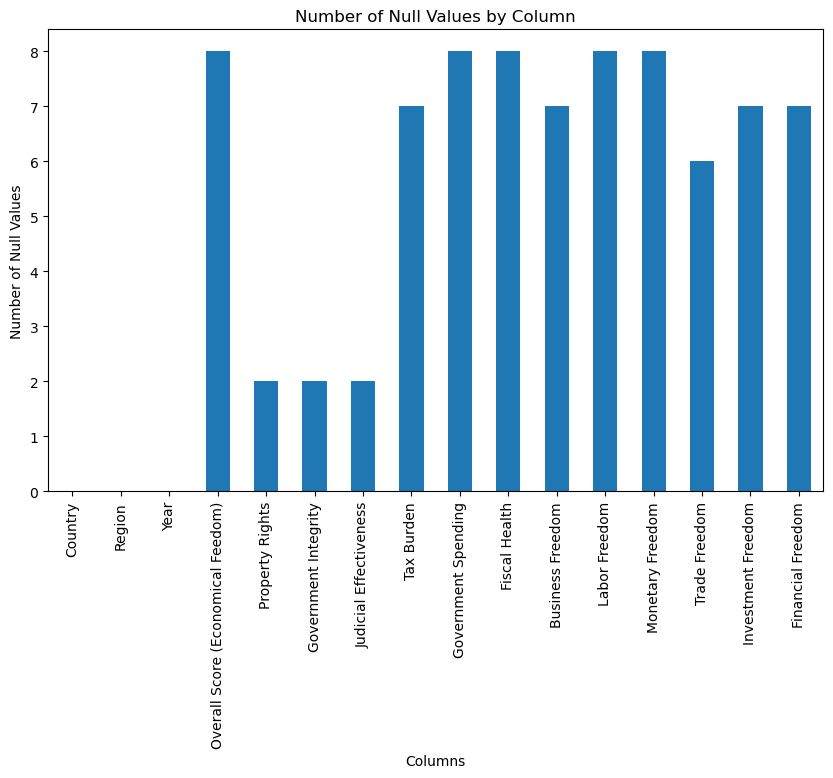

In [11]:
# Alternatively, you can use pandas built-in plotting
df.isnull().sum().plot(kind='bar', figsize=(10, 6))
plt.title('Number of Null Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()

In [46]:
# Count null values in each row
null_counts_per_row = df.isnull().sum(axis=1)
# Filter rows with more than 5 null values

rows_to_keep = null_counts_per_row <= 5
filtered_data = df[rows_to_keep]

In [47]:
# Delete rows with more than 5 null values
df = df[rows_to_keep]

# Display the shape of the updated DataFrame
print("Updated data shape:", df.shape)


Updated data shape: (176, 16)


In [48]:
print(df.isnull().sum())

Country                              0
Region                               0
Year                                 0
Overall Score (Economical Feedom)    0
Property Rights                      0
Government Integrity                 0
Judicial Effectiveness               0
Tax Burden                           0
Government Spending                  0
Fiscal Health                        0
Business Freedom                     0
Labor Freedom                        0
Monetary Freedom                     0
Trade Freedom                        0
Investment Freedom                   0
Financial Freedom                    0
dtype: int64


# Visualization


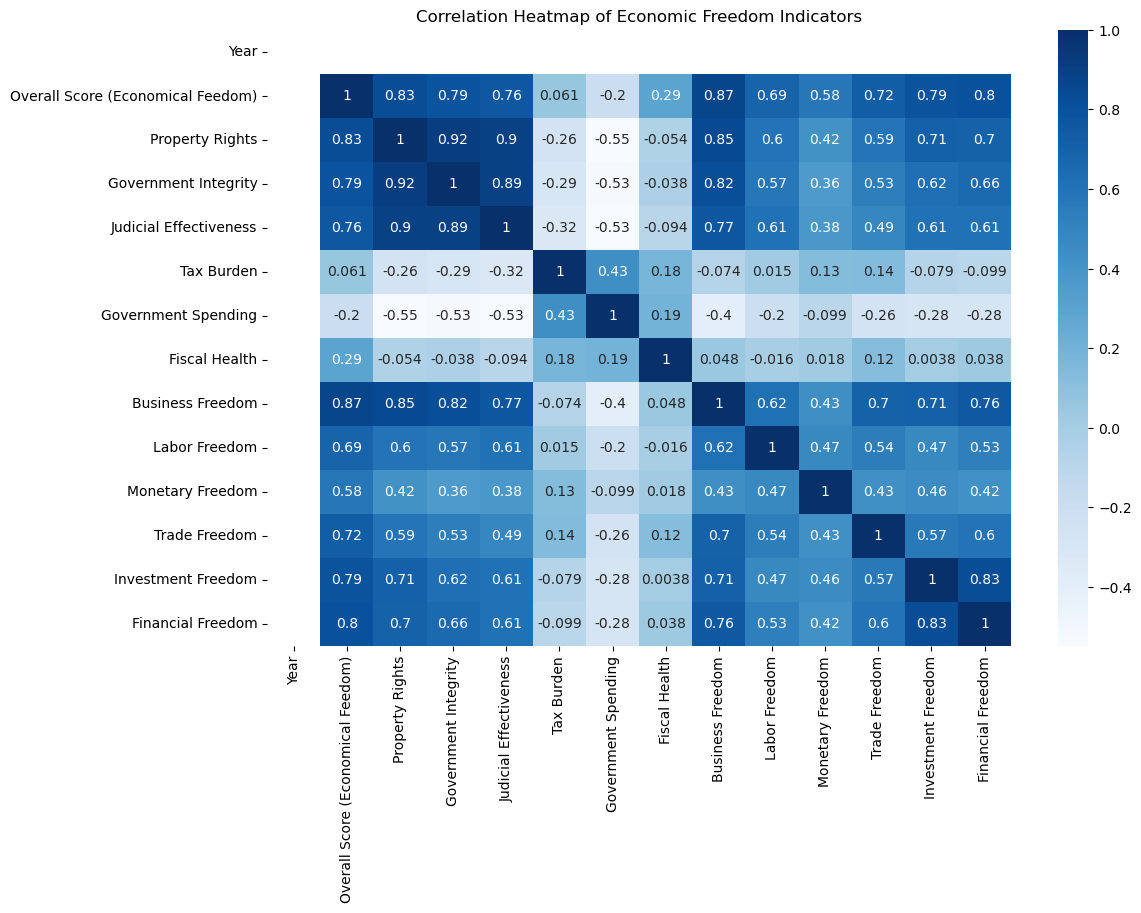

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Economic Freedom Indicators')
plt.show()

In [49]:
df.head()

,Country,Region,Year,Overall Score (Economical Feedom),Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
1,Albania,Europe,2024,64.8,56.8,36.6,50.0,88.8,69.8,51.7,74.1,51.5,75.7,82.6,70.0,70.0
2,Algeria,Middle East/North Africa,2024,43.9,27.5,27.7,28.9,79.4,54.7,13.8,54.4,51.4,71.9,57.4,30.0,30.0
3,Angola,Sub-Saharan Africa,2024,54.3,40.4,27.8,25.7,86.5,85.8,91.1,44.6,50.8,60.0,68.6,30.0,40.0
4,Argentina,Americas,2024,49.9,34.5,39.8,55.8,67.0,54.3,35.7,55.5,53.5,29.4,58.6,55.0,60.0
5,Armenia,Europe,2024,64.9,50.3,50.0,31.6,87.6,75.5,69.1,69.2,58.9,67.5,73.6,75.0,70.0


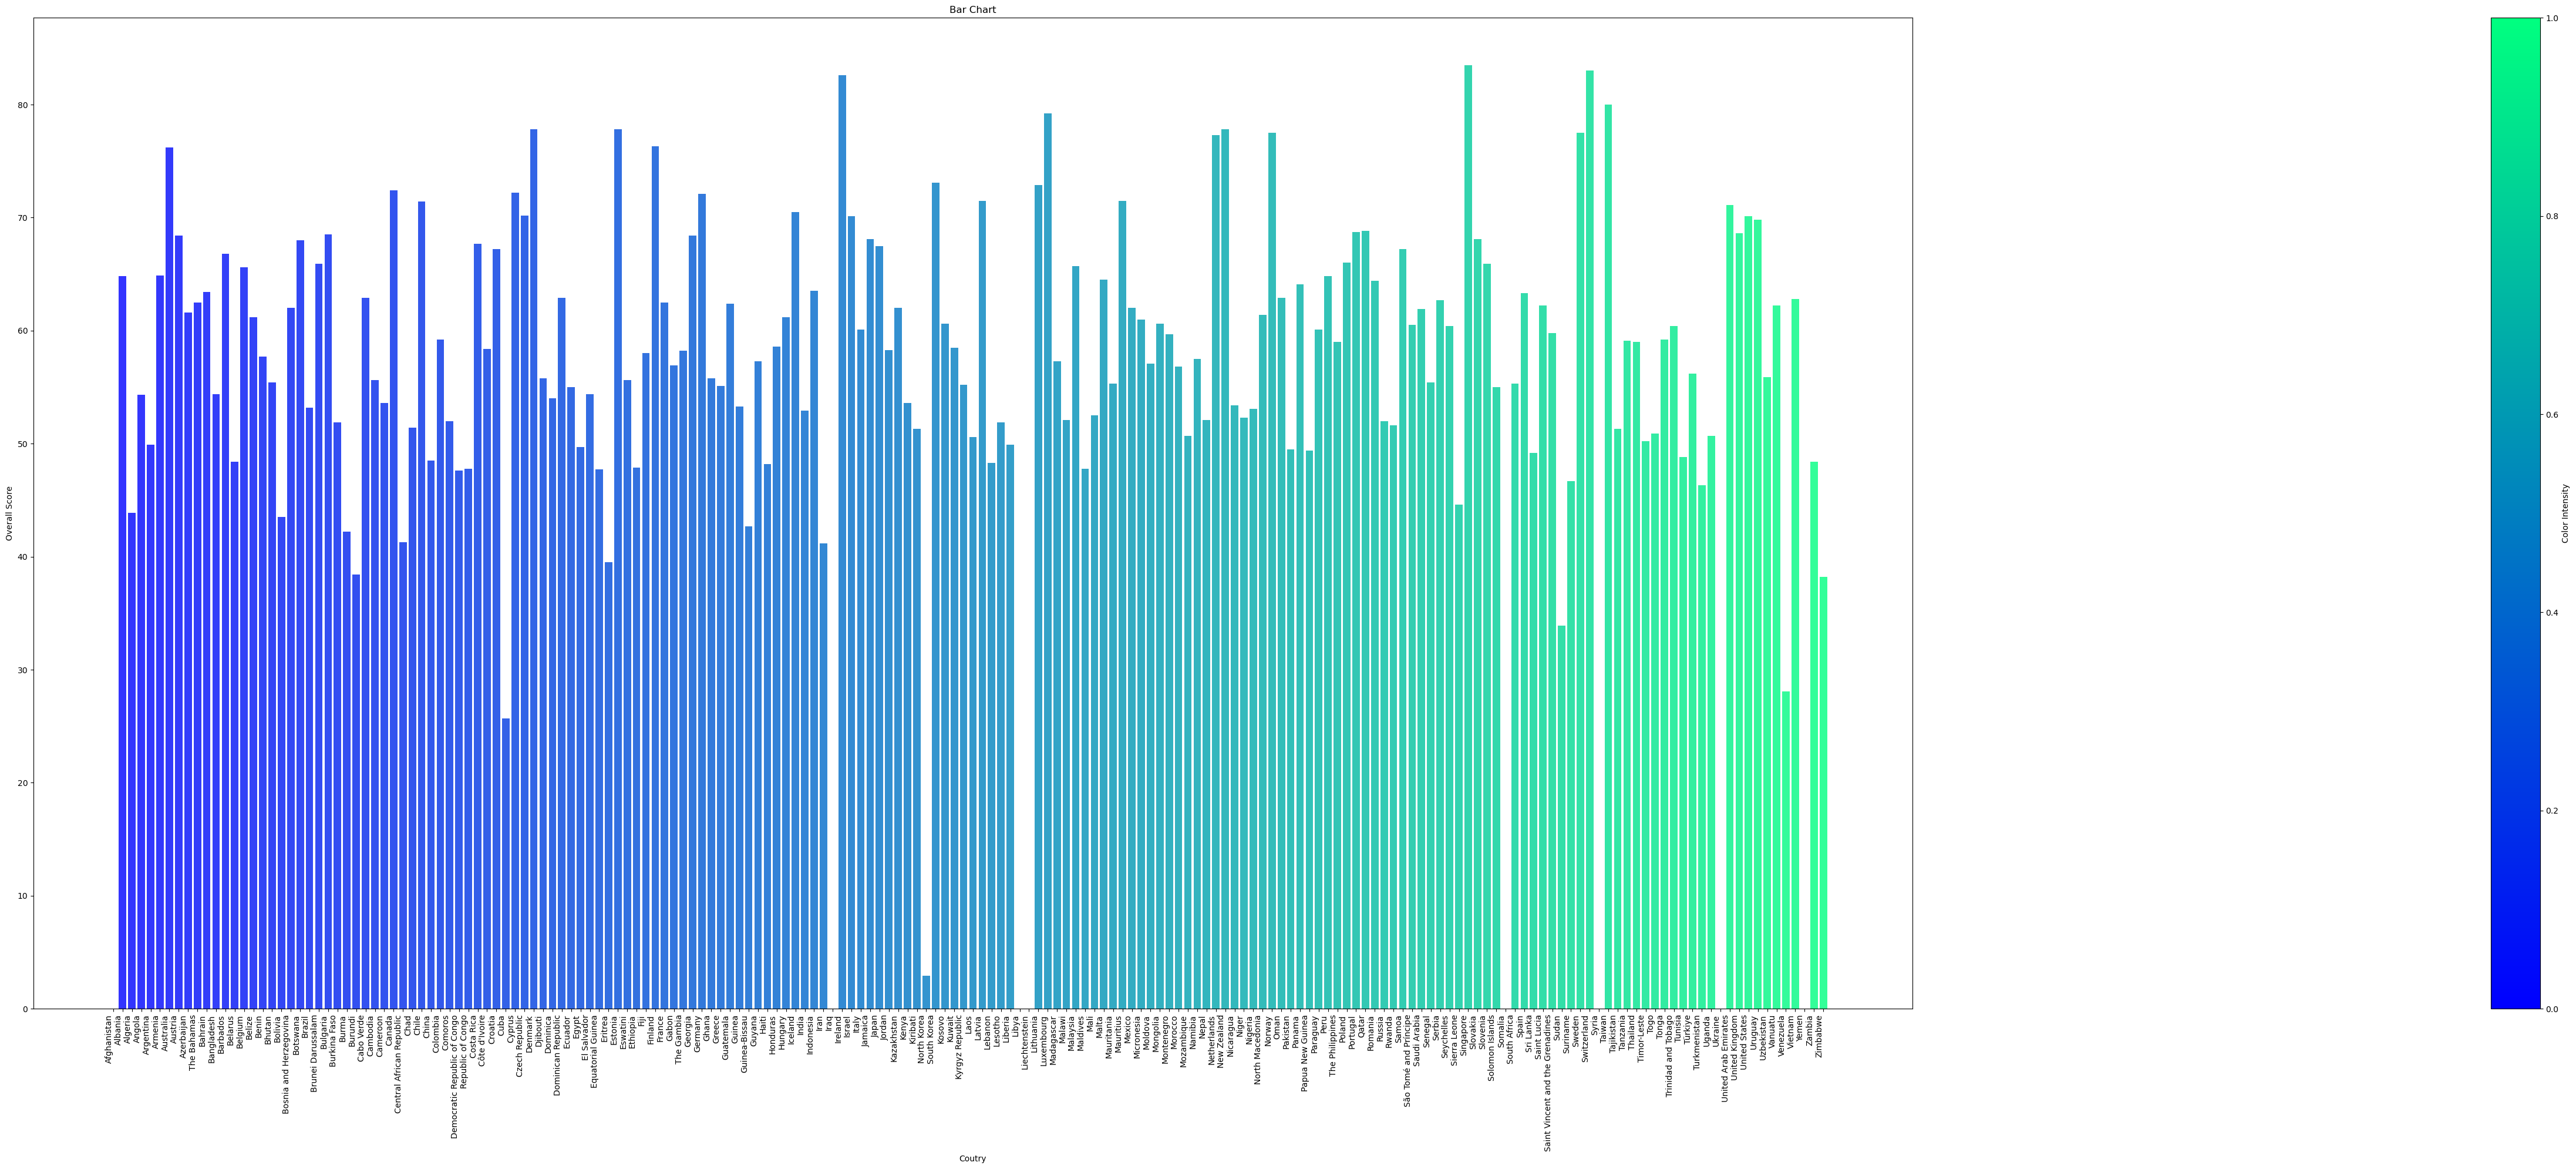

In [34]:
# Sample data
x = df['Country']
y = df['Overall Score (Economical Feedom)']

# Create a colormap
colors = plt.cm.winter(np.linspace(0, 1, len(x)))

# Create the bar chart with different colors for each state
plt.figure(figsize=(50, 20))
bars = plt.bar(x, y, color=colors, alpha=0.8)

# Customize the plot
plt.title('Bar Chart')
plt.xlabel('Coutry')
plt.ylabel('Overall Score')

# Show a color bar to indicate the mapping of colors to states
color_bar = plt.colorbar(plt.cm.ScalarMappable(cmap='winter'), ax=plt.gca(), pad=0.2)
color_bar.set_label('Color Intensity')

plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_1620\1775611873.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_bottom_df = top_bottom_df.append(top_five)
C:\Users\HP\AppData\Local\Temp\ipykernel_1620\1775611873.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_bottom_df = top_bottom_df.append(bottom_five)
C:\Users\HP\AppData\Local\Temp\ipykernel_1620\1775611873.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_bottom_df = top_bottom_df.append(top_five)
C:\Users\HP\AppData\Local\Temp\ipykernel_1620\1775611873.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_bottom_df = top_bottom_df.append(bottom_five)
C:\Users\H

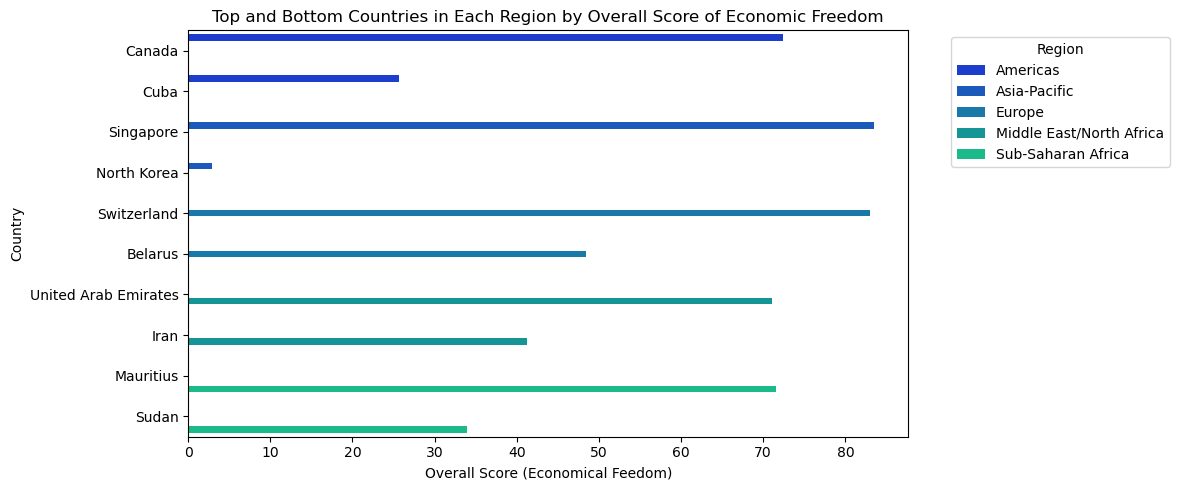

In [50]:
# Group the data by 'Region'
grouped = df.groupby('Region')

# Create a DataFrame to store the top and bottom countries from each region
top_bottom_df = pd.DataFrame(columns=['Country', 'Overall Score (Economical Feedom)', 'Region'])

# Iterate over each group
for name, group in grouped:
    # Sort the group by 'Overall Score (Economical Feedom)' column
    sorted_group = group.sort_values(by='Overall Score (Economical Feedom)', ascending=False)
    
    # Select the top five and bottom five countries
    top_five = sorted_group.head(1)
    bottom_five = sorted_group.tail(1)
    
    # Append to the top_bottom_df DataFrame
    top_bottom_df = top_bottom_df.append(top_five)
    top_bottom_df = top_bottom_df.append(bottom_five)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x='Overall Score (Economical Feedom)', y='Country', hue='Region', data=top_bottom_df, palette='winter')
plt.title('Top and Bottom Countries in Each Region by Overall Score of Economic Freedom')
plt.xlabel('Overall Score (Economical Feedom)')
plt.ylabel('Country')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

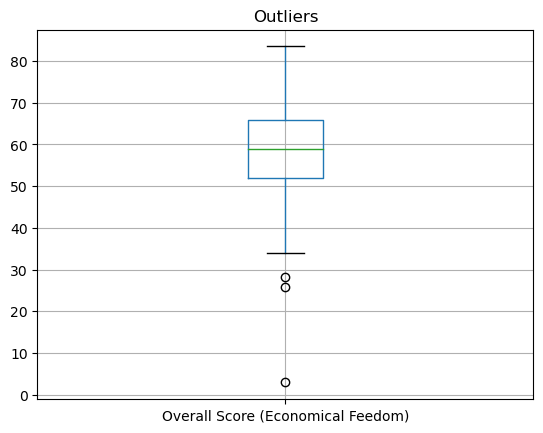

In [18]:
df.boxplot(column=['Overall Score (Economical Feedom)']) 
plt.title('Outliers') 
plt.show()

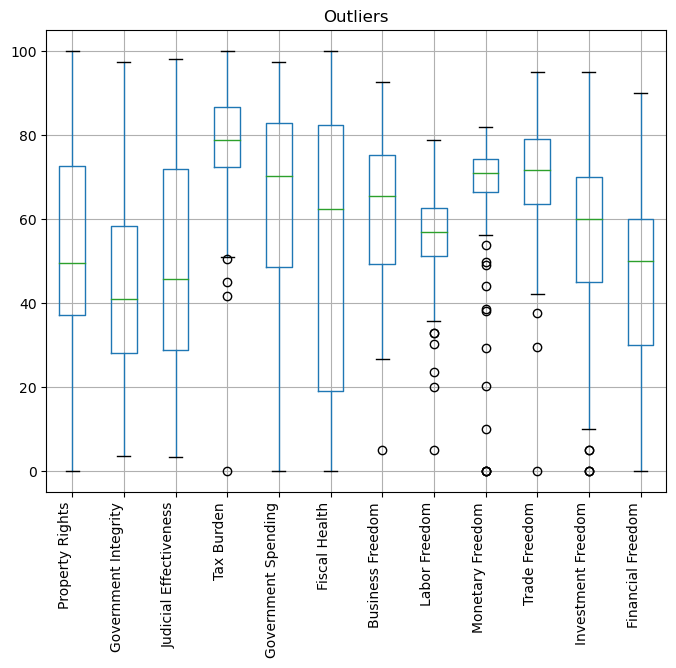

In [19]:
plt.figure(figsize=(8,6))
df.boxplot(column=['Property Rights','Government Integrity','Judicial Effectiveness','Tax Burden','Government Spending','Fiscal Health','Business Freedom','Labor Freedom','Monetary Freedom','Trade Freedom','Investment Freedom','Financial Freedom'])

plt.title('Outliers')
plt.xticks(rotation=90, ha='right')
plt.show()

In [22]:
# Assuming 'df' is the DataFrame containing your data
outlier_threshold = 1.5  # You can adjust this threshold as needed

# Calculate the interquartile range (IQR)
Q1 = df['Overall Score (Economical Feedom)'].quantile(0.25)
Q3 = df['Overall Score (Economical Feedom)'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
upper_bound = Q3 + outlier_threshold * IQR
lower_bound = Q1 - outlier_threshold * IQR

# Filter rows with values outside the bounds
outliers = df[(df['Overall Score (Economical Feedom)'] < lower_bound) | (df['Overall Score (Economical Feedom)'] > upper_bound)]

# Display the full rows of outliers
print(outliers)


         Country        Region  Year  Overall Score (Economical Feedom)  \
42          Cuba      Americas  2024                               25.7   
87   North Korea  Asia-Pacific  2024                                2.9   
179    Venezuela      Americas  2024                               28.1   

     Property Rights  Government Integrity  Judicial Effectiveness  \
42              30.1                  36.2                    15.2   
87              16.0                   3.6                     5.4   
179              0.0                   6.4                     3.3   

     Tax Burden  Government Spending  Fiscal Health  Business Freedom  \
42         51.9                  0.0            0.0              41.5   
87          0.0                  0.0            0.0               5.0   
179        75.9                 96.6           36.5              31.0   

     Labor Freedom  Monetary Freedom  Trade Freedom  Investment Freedom  \
42            20.0              20.3           72.

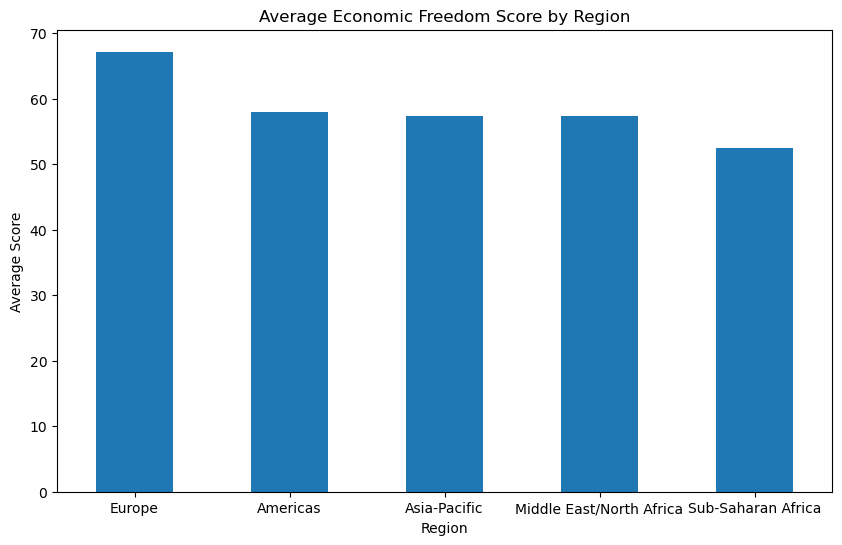

In [88]:
# Bar chart - Average scores by region
avg_scores_by_region = df.groupby('Region')['Overall Score (Economical Feedom)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_scores_by_region.plot(kind='bar')
plt.title('Average Economic Freedom Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

In [45]:
df.head()

,Country,Region,Year,Overall Score (Economical Feedom),Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,Afghanistan,Asia-Pacific,2024,NaN,4.9,18.1,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,2024,64.8,56.8,36.6,50.0,88.8,69.8,51.7,74.1,51.5,75.7,82.6,70.0,70.0
2,Algeria,Middle East/North Africa,2024,43.9,27.5,27.7,28.9,79.4,54.7,13.8,54.4,51.4,71.9,57.4,30.0,30.0
3,Angola,Sub-Saharan Africa,2024,54.3,40.4,27.8,25.7,86.5,85.8,91.1,44.6,50.8,60.0,68.6,30.0,40.0
4,Argentina,Americas,2024,49.9,34.5,39.8,55.8,67.0,54.3,35.7,55.5,53.5,29.4,58.6,55.0,60.0


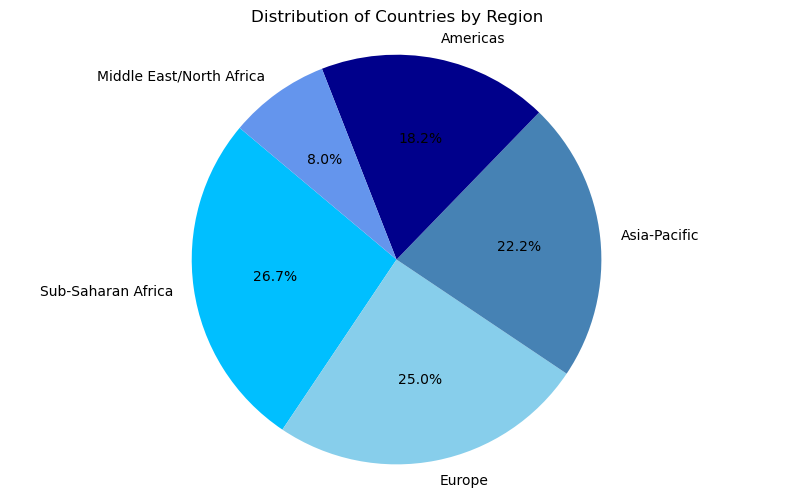

In [99]:
# Pie chart - Distribution of regions
region_counts = df['Region'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140, colors=['#00BFFF', '#87CEEB', '#4682B4', '#00008B','#6495ED'])
plt.title('Distribution of Countries by Region')
plt.axis('equal')
plt.show()


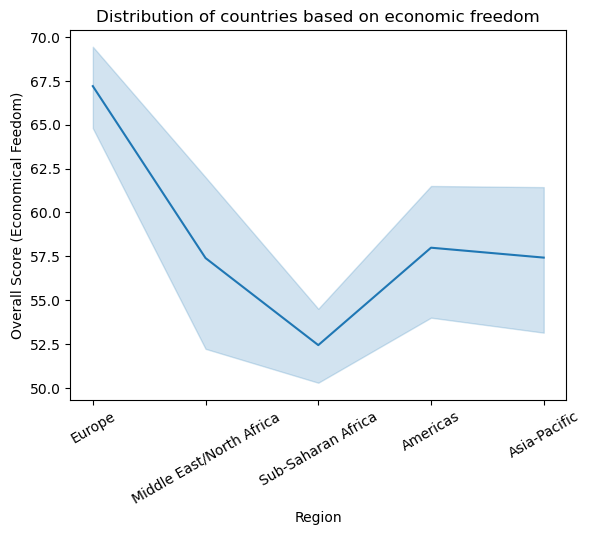

In [102]:
# draw lineplot
sns.lineplot(x="Region", y="Overall Score (Economical Feedom)", data=df)
 
# setting the title using Matplotlib
plt.title('Distribution of countries based on economic freedom')
plt.xticks(rotation=30)
plt.show()

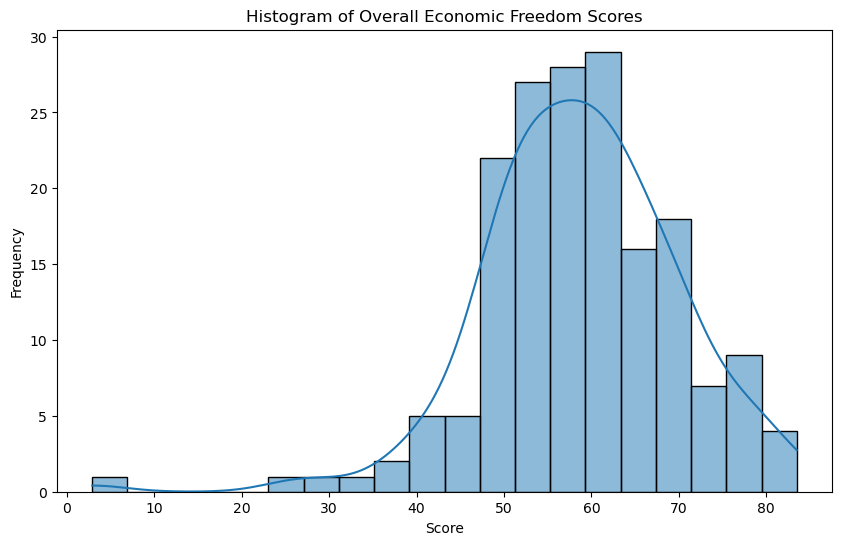

In [26]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Overall Score (Economical Feedom)'], bins=20, kde=True)
plt.title('Histogram of Overall Economic Freedom Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

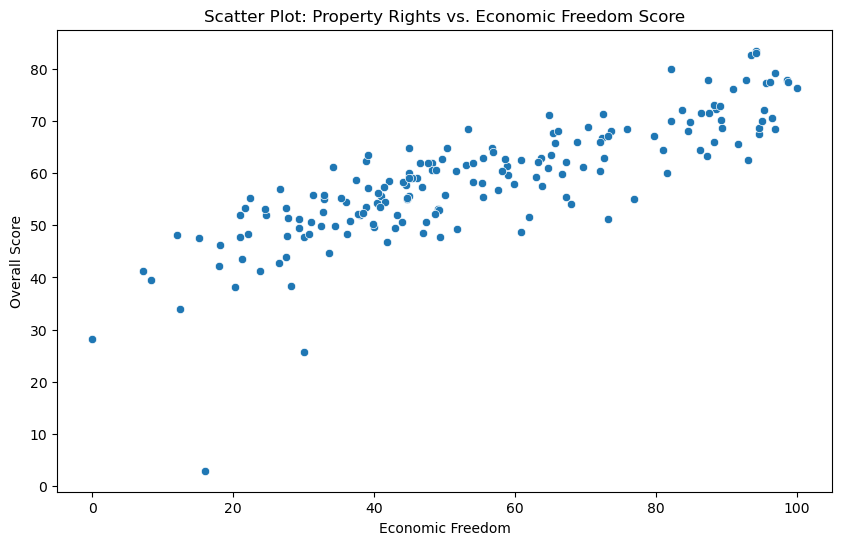

In [103]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Property Rights', y='Overall Score (Economical Feedom)', data=df)
plt.title('Scatter Plot: Property Rights vs. Economic Freedom Score')
plt.xlabael('Economic Freedom')
plt.ylabel('Overall Score')
plt.show()

<Figure size 1500x1500 with 0 Axes>

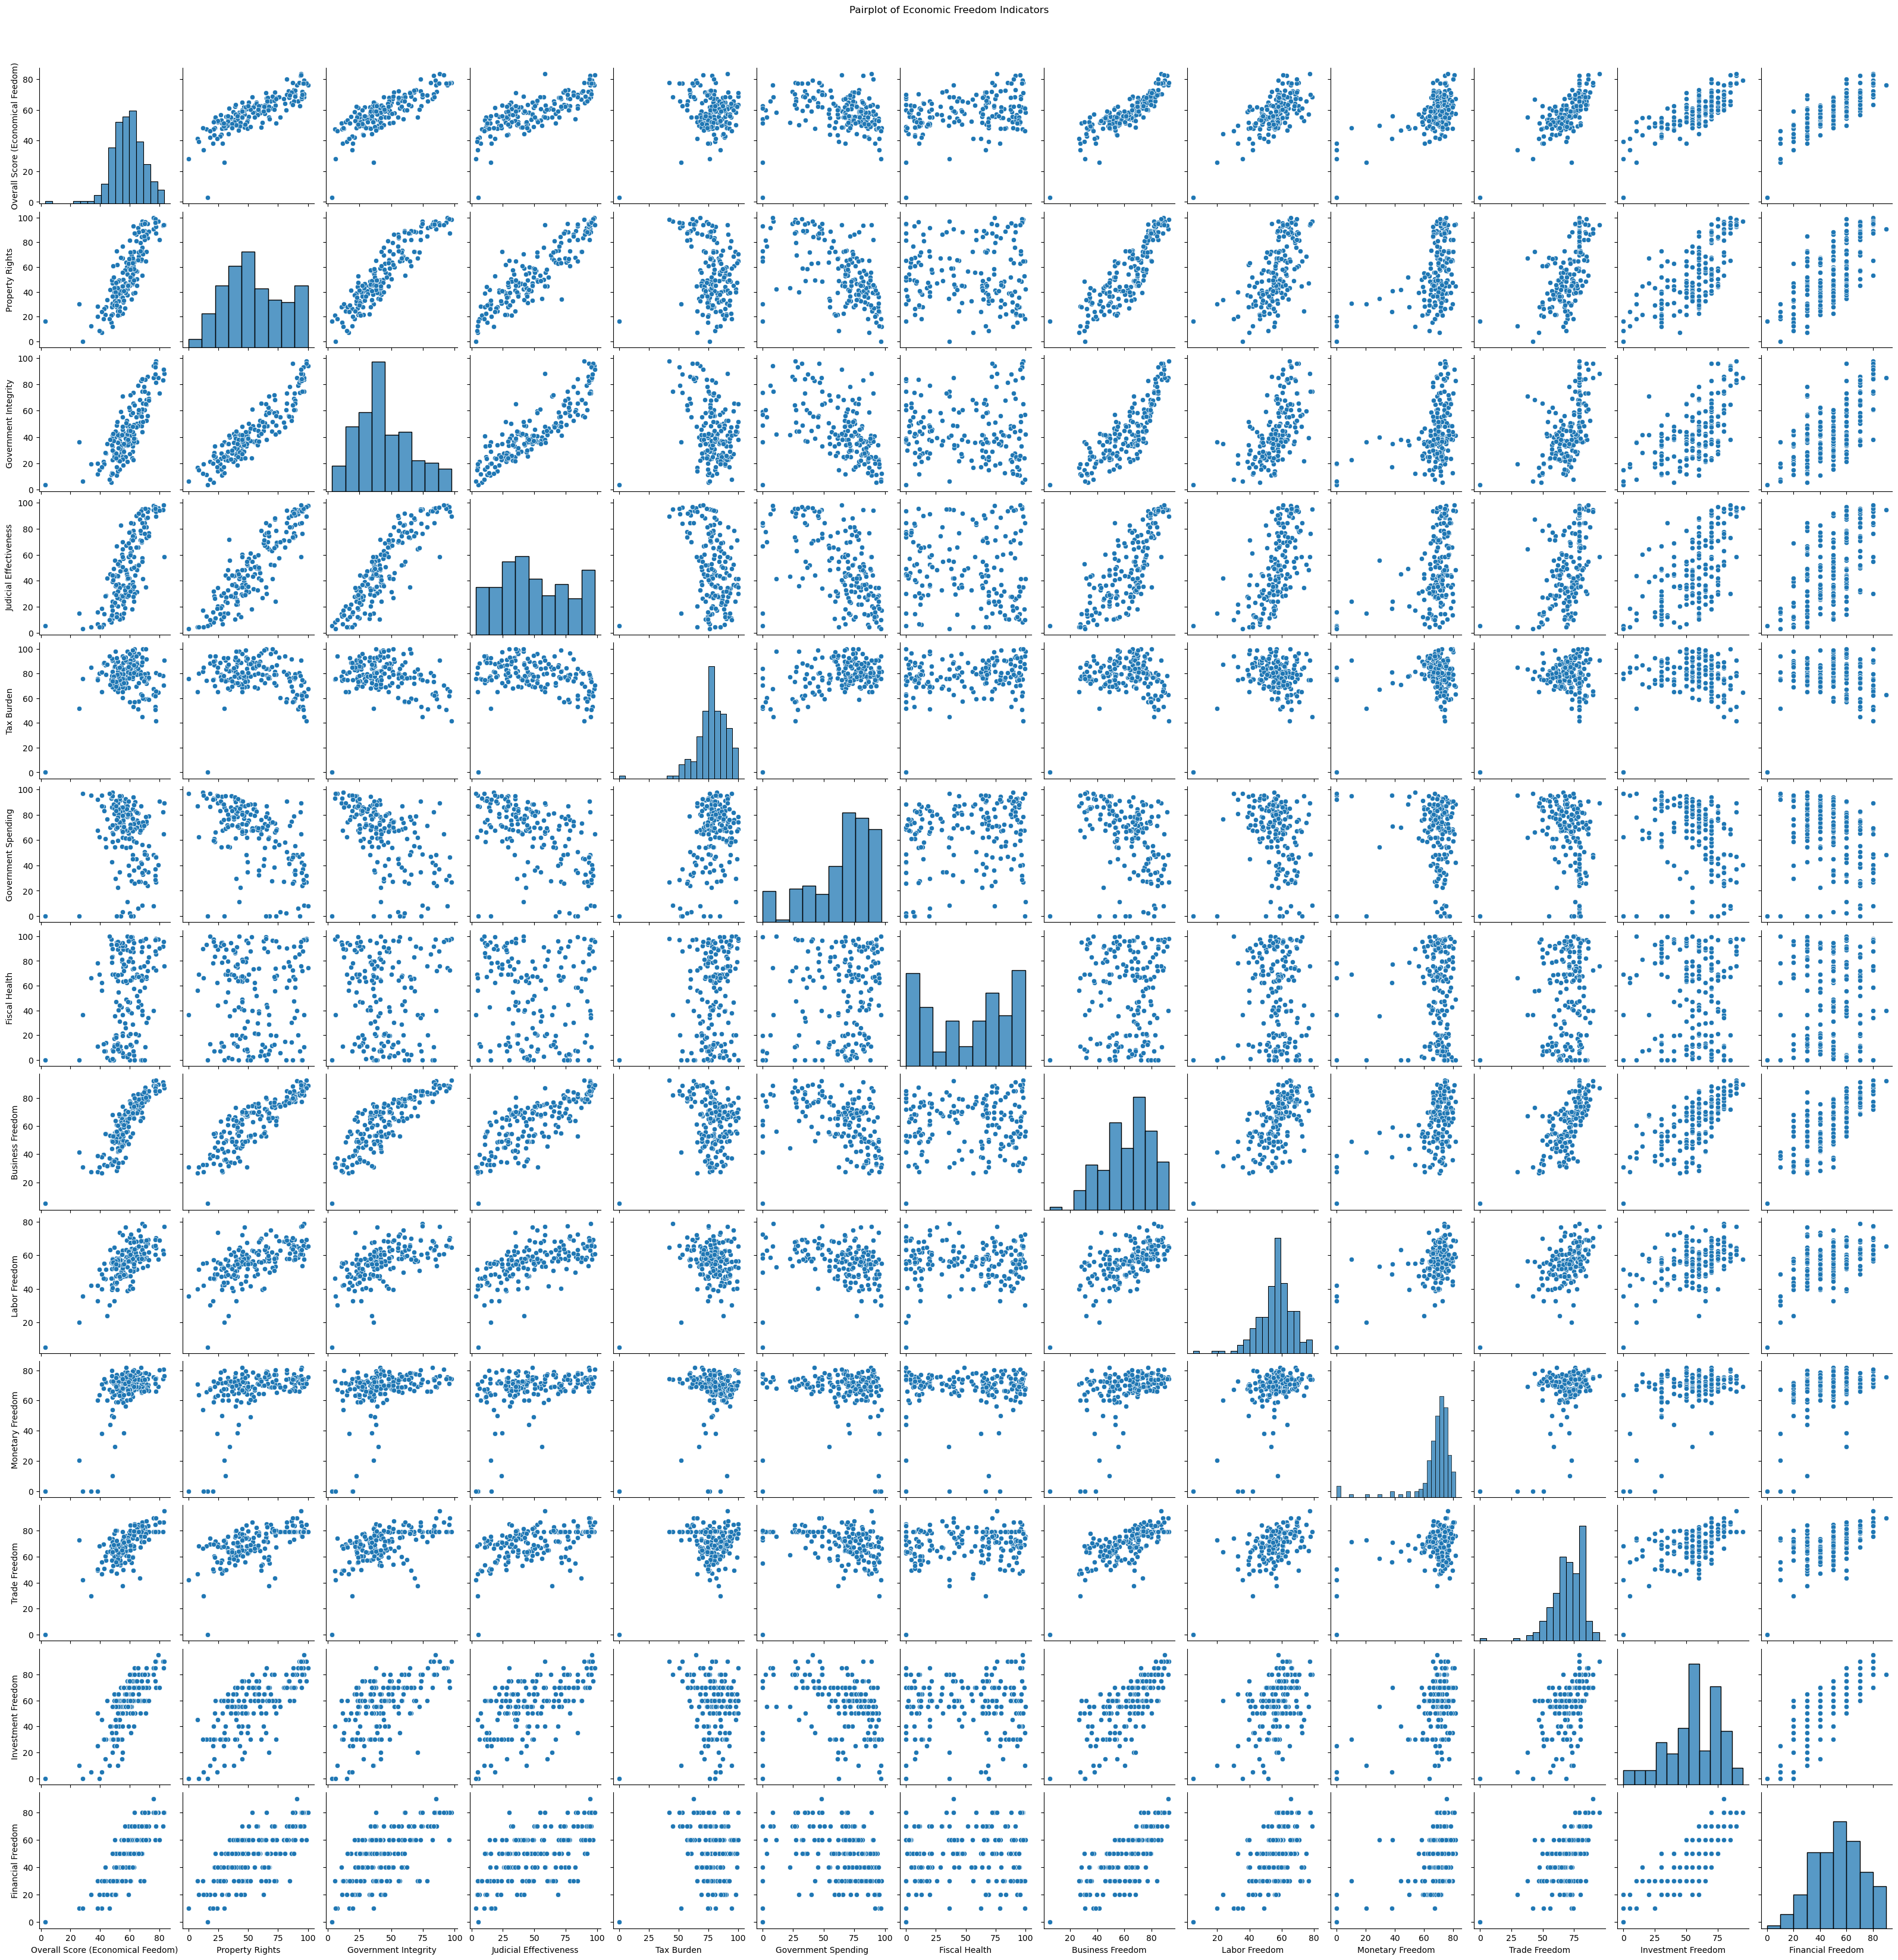

In [28]:
# Drop 'Country', 'Region', and 'Year' columns
df_numeric = df.drop(['Country', 'Region', 'Year'], axis=1)

# Pairplot
plt.figure(figsize=(15, 15))
sns.pairplot(df_numeric, palette='bright')
plt.suptitle('Pairplot of Economic Freedom Indicators', y=1.02)
plt.show()

Regression

In [80]:
# Define features (independent variables) and target variable
X = df[['Property Rights','Government Integrity','Judicial Effectiveness','Business Freedom','Fiscal Health','Labor Freedom','Monetary Freedom','Trade Freedom','Investment Freedom','Financial Freedom']]
y = df['Overall Score (Economical Feedom)']

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [82]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [83]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [84]:
# Predictions on testing set
y_pred = model.predict(X_test)

In [85]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.775590813261439


In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print("R-squared (Coefficient of Determination):", r2)

Mean Absolute Error (MAE): 1.786220631733564
Mean Squared Error (MSE): 4.775590813261439
Root Mean Squared Error (RMSE): 2.1853125207304878
R-squared (Coefficient of Determination): 0.9431487885490473


In [87]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.775590813261439
R-squared: 0.9431487885490473
